# Classical Computer Vision & Python Notebook

This notebook provides a comprehensive introduction to classical computer vision techniques using OpenCV and Python!

**What you'll learn:**
- Reading and displaying images and videos
- Image transformations and color spaces
- Filtering, edge detection, and enhancement
- Building complete CV pipelines

Let's get started!

## 0. Installation

Before we begin, we need to install the required libraries. Run the cell below to install all dependencies.

**Required Libraries:**
- **opencv-python**: Main computer vision library
- **numpy**: Numerical computing and array operations
- **Pillow**: Python Imaging Library for image display
- **ipython**: Interactive Python environment for Jupyter notebooks

In [1]:
# Install required packages
# Run this cell only once to install all dependencies

# Uncomment the lines below if you need to install packages
# !pip install opencv-python
# !pip install numpy
# !pip install Pillow
# !pip install ipython

# OR install all at once:
# !pip install opencv-python numpy Pillow ipython

print("Installation commands are ready!")
print("Uncomment the lines above to install packages.")
print("\nAlternatively, run this in your terminal:")
print("pip install opencv-python numpy Pillow ipython")

Installation commands are ready!
Uncomment the lines above to install packages.

Alternatively, run this in your terminal:
pip install opencv-python numpy Pillow ipython


## 1. Setup and Imports

First, we need to import the necessary libraries for computer vision operations.

In [2]:
# Core libraries for computer vision
import cv2  # OpenCV - the main computer vision library
import numpy as np  # Numerical operations on arrays/images

# Libraries for display in Jupyter Notebook
from PIL import Image, ImageDraw, ImageFont  # Python Imaging Library
from IPython.display import display, clear_output
import IPython.display

print("All libraries imported successfully!")
print(f"OpenCV version: {cv2.__version__}")

All libraries imported successfully!
OpenCV version: 4.12.0


## 2. Reading Images

Images are the foundation of computer vision. Let's learn how to read images from files.

In [3]:
# Read an image from file
# Note: OpenCV reads images in BGR (Blue-Green-Red) format, not RGB!
image_path = "example.png"  # Change this to your image path
img = cv2.imread(image_path)
img = np.copy(frame)
# Check if image was loaded successfully
if img is None:
    print("Error: Could not read image. Check the file path!")
else:
    print("Image loaded successfully!")
    print(f"Image shape: {img.shape}")  # (height, width, channels)
    print(f"Image dimensions: {img.shape[1]} x {img.shape[0]} pixels")
    print(f"Number of channels: {img.shape[2]}")
    print(f"Data type: {img.dtype}")

[ WARN:0@0.016] global loadsave.cpp:275 findDecoder imread_('example.png'): can't open/read file: check file path/integrity


NameError: name 'frame' is not defined

## 3. Displaying Images

Let's create a helper function to display images properly in Jupyter notebooks.

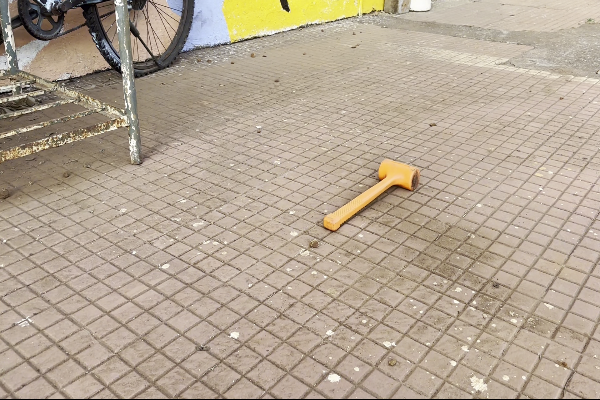

In [ ]:
def display_image(frame, frame_size=(500, 300), title="Image"):
    """
    Display an image in Jupyter Notebook.
    
    Args:
        frame: Image array (numpy array)
        frame_size: Tuple of (width, height) for display
        title: Title for the image
    
    Returns:
        PIL Image object
    """
    # Check if image is normalized (float between 0-1)
    if frame.dtype != np.uint8:
        frame = (frame * 255).astype(np.uint8)
    
    # Handle grayscale images
    if len(frame.shape) == 2:
        frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)
    
    # Convert BGR (OpenCV format) to RGB (PIL format)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Resize the frame for display
    frame = cv2.resize(frame, frame_size)
    
    # Convert to PIL Image
    img = Image.fromarray(frame)

    display(img)
    
    return

# Display the loaded image
if img is not None:
    display_image(img, frame_size=(600, 400))

## 4. Comparing Images Side by Side

It's often useful to compare original and processed images. Let's create a function for that.

In [ ]:
def display_images(frame1, frame2, label1="Original", label2="Processed", frame_size=(500, 300)):
    """
    Display two images side by side with labels.
    
    Args:
        frame1: First image
        frame2: Second image
        label1: Label for first image
        label2: Label for second image
        frame_size: Size for each image
    
    Returns:
        Combined PIL Image
    """
    # Ensure images are uint8
    if frame1.dtype != np.uint8:
        frame1 = (frame1 * 255).astype(np.uint8)
    if frame2.dtype != np.uint8:
        frame2 = (frame2 * 255).astype(np.uint8)
    
    # Handle grayscale images
    if len(frame1.shape) == 2:
        frame1 = cv2.cvtColor(frame1, cv2.COLOR_GRAY2BGR)
    if len(frame2.shape) == 2:
        frame2 = cv2.cvtColor(frame2, cv2.COLOR_GRAY2BGR)
    
    # Convert BGR to RGB
    frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
    frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)
    
    # Resize images
    frame1 = cv2.resize(frame1, frame_size)
    frame2 = cv2.resize(frame2, frame_size)
    
    # Convert to PIL images
    img1 = Image.fromarray(frame1)
    img2 = Image.fromarray(frame2)
    
    # Create combined canvas
    combined_width = frame_size[0] * 2
    combined_height = frame_size[1] + 40
    combined_img = Image.new("RGB", (combined_width, combined_height), (255, 255, 255))
    
    # Paste images
    combined_img.paste(img1, (0, 40))
    combined_img.paste(img2, (frame_size[0], 40))
    
    # Add labels
    draw = ImageDraw.Draw(combined_img)
    try:
        font = ImageFont.truetype("arial.ttf", 20)
    except:
        font = ImageFont.load_default()
    
    draw.text((frame_size[0] // 2 - 50, 10), label1, fill="black", font=font)
    draw.text((frame_size[0] + frame_size[0] // 2 - 50, 10), label2, fill="black", font=font)

    display(combined_img)
    
    return combined_img

## 5. Grid Display for Multiple Images

For comparing multiple processed versions, a grid layout is very useful.

In [ ]:
def plot_images(frame_size=(400, 250), columns=2, **kwargs):
    """
    Display multiple images in a grid with labels.
    
    Args:
        frame_size: Size for each image
        columns: Number of columns in the grid
        **kwargs: Dictionary of images with labels as keys
    
    Example:
        plot_images(**{"Original": img1, "Blurred": img2, "Edges": img3})
    """
    if not kwargs:
        print("No images provided!")
        return None
    
    images = []
    labels = []
    
    for label, frame in kwargs.items():
        # Ensure images are uint8
        if frame.dtype != np.uint8:
            frame = (frame * 255).astype(np.uint8)
        
        # Handle grayscale images
        if len(frame.shape) == 2:
            frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)
        
        # Convert BGR to RGB
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = cv2.resize(frame, frame_size)
        
        images.append(Image.fromarray(frame))
        labels.append(label)
    
    # Calculate grid dimensions
    cols = max(1, columns)
    rows = int(np.ceil(len(images) / cols))
    
    # Create canvas
    label_height = 40
    combined_width = frame_size[0] * cols
    combined_height = rows * (frame_size[1] + label_height)
    combined_img = Image.new("RGB", (combined_width, combined_height), (255, 255, 255))
    
    # Draw images and labels
    draw = ImageDraw.Draw(combined_img)
    try:
        font = ImageFont.truetype("arial.ttf", 18)
    except:
        font = ImageFont.load_default()
    
    for idx, (img_pil, label) in enumerate(zip(images, labels)):
        row = idx // cols
        col = idx % cols
        x_offset = col * frame_size[0]
        y_offset = row * (frame_size[1] + label_height)
        
        # Draw label
        draw.text((x_offset + 10, y_offset + 10), label, fill="black", font=font)
        
        # Paste image
        combined_img.paste(img_pil, (x_offset, y_offset + label_height))

    display(combined_img)
    
    return combined_img

## 6. Working with Videos

Videos are just sequences of images. Let's learn how to work with them.

Video Info:
   FPS: 29.994340690435767
   Total frames: 530
   Duration: 17.67 seconds
Frame captured at 3.0 seconds


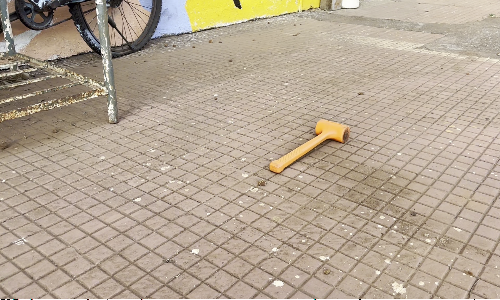

In [ ]:
def capture_frame(video_path, time_sec=1.0):
    """
    Capture a single frame from a video at a specific time.
    
    Args:
        video_path: Path to the video file
        time_sec: Time in seconds where to capture the frame
    
    Returns:
        Frame as numpy array
    """
    cap = cv2.VideoCapture(video_path)
    
    if not cap.isOpened():
        print("Error: Could not open video file")
        return None
    
    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = total_frames / fps if fps > 0 else 0
    
    print(f"Video Info:")
    print(f"   FPS: {fps}")
    print(f"   Total frames: {total_frames}")
    print(f"   Duration: {duration:.2f} seconds")
    
    # Set frame position
    frame_index = int(time_sec * fps)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
    
    ret, frame = cap.read()
    cap.release()
    
    if not ret:
        print(f"Failed to capture frame at {time_sec} seconds")
        return None
    
    print(f"Frame captured at {time_sec} seconds")
    return frame

# Example: Capture a frame from video
video_path = "/home/pradyun/CV_practice/Assignment-4/Mallet_videos/IMG_9110.MOV"  # Change to your video path
frame = capture_frame(video_path, time_sec=3.0)
if frame is not None:
    display_image(frame)

## 7. Basic Image Transformations

### 7.1 Grayscale Conversion
Converting images to grayscale is often the first step in many CV pipelines.

Original shape: (1080, 1920, 3)
Grayscale shape: (1080, 1920)


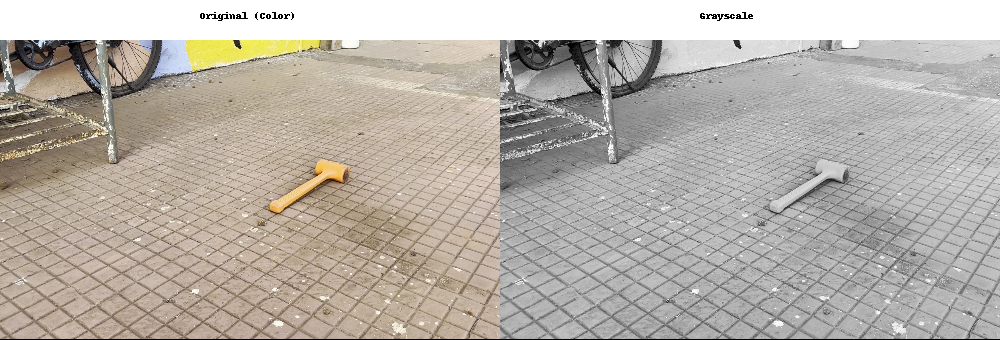

In [ ]:
# Convert image to grayscale
if img is not None:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    print(f"Original shape: {img.shape}")
    print(f"Grayscale shape: {gray_img.shape}")
    
    # Display comparison
    display_images(img, cv2.cvtColor(gray_img, cv2.COLOR_GRAY2BGR), 
                   "Original (Color)", "Grayscale")

### 7.2 Resizing Images
Changing image dimensions is useful for standardizing inputs or reducing computation.

Original size: 1920 x 1080
Resized: 400 x 300
Scaled (50%): 960 x 540


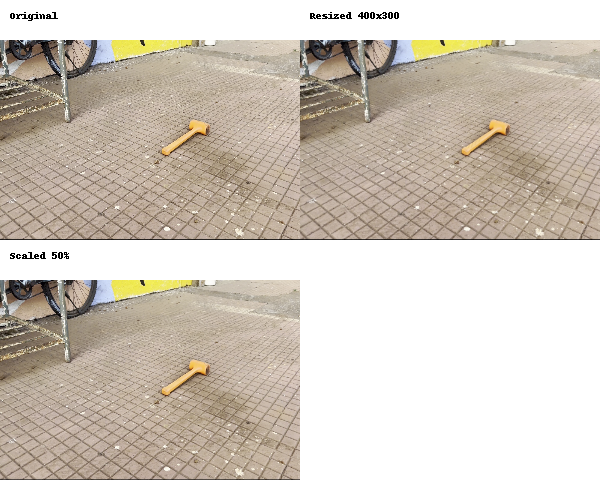

In [ ]:
if img is not None:
    # Resize to specific dimensions
    resized_img = cv2.resize(img, (400, 300))
    
    # Resize by scale factor
    scale_percent = 50  # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    scaled_img = cv2.resize(img, (width, height))
    
    print(f"Original size: {img.shape[1]} x {img.shape[0]}")
    print(f"Resized: {resized_img.shape[1]} x {resized_img.shape[0]}")
    print(f"Scaled (50%): {scaled_img.shape[1]} x {scaled_img.shape[0]}")
    
    plot_images(frame_size=(300, 200), **{
        "Original": img,
        "Resized 400x300": resized_img,
        "Scaled 50%": scaled_img
    })

### 7.3 Image Rotation and Flipping

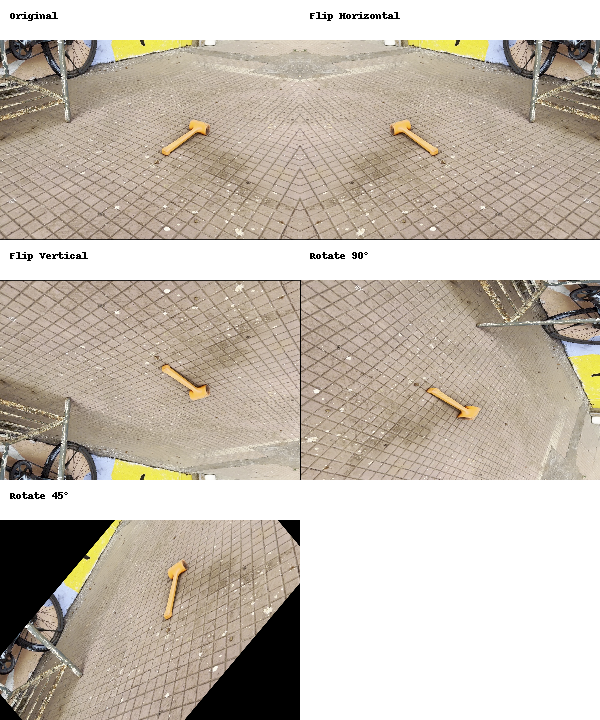

In [ ]:
if img is not None:
    # Flip horizontally
    flipped_h = cv2.flip(img, 1)
    
    # Flip vertically
    flipped_v = cv2.flip(img, 0)
    
    # Rotate 90 degrees clockwise
    rotated_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    
    # Rotate by arbitrary angle
    height, width = img.shape[:2]
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, 45, 1.0)  # 45 degrees
    rotated_45 = cv2.warpAffine(img, rotation_matrix, (width, height))
    
    plot_images(frame_size=(300, 200), **{
        "Original": img,
        "Flip Horizontal": flipped_h,
        "Flip Vertical": flipped_v,
        "Rotate 90°": rotated_90,
        "Rotate 45°": rotated_45
    })

## 8. Color Spaces

Different color spaces are useful for different tasks.

### 8.1 HSV Color Space
HSV (Hue, Saturation, Value) is great for color-based segmentation.

HSV Color Space:
  H (Hue): Represents the color type (0-179 in OpenCV)
  S (Saturation): Color intensity (0-255)
  V (Value): Brightness (0-255)


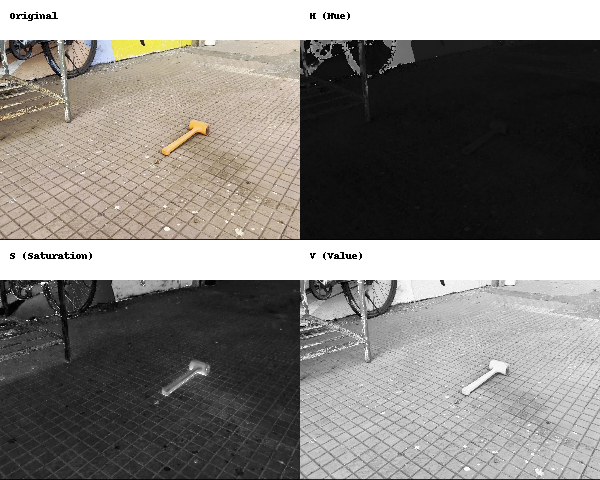

In [ ]:
if img is not None:
    # Convert to HSV
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Split channels
    H, S, V = cv2.split(hsv_img)
    
    print("HSV Color Space:")
    print("  H (Hue): Represents the color type (0-179 in OpenCV)")
    print("  S (Saturation): Color intensity (0-255)")
    print("  V (Value): Brightness (0-255)")
    
    plot_images(frame_size=(300, 200), **{
        "Original": img,
        "H (Hue)": cv2.cvtColor(H, cv2.COLOR_GRAY2BGR),
        "S (Saturation)": cv2.cvtColor(S, cv2.COLOR_GRAY2BGR),
        "V (Value)": cv2.cvtColor(V, cv2.COLOR_GRAY2BGR)
    })

### 8.2 LAB Color Space
LAB is perceptually uniform and good for measuring color differences.

LAB Color Space:
  L (Lightness): 0 (black) to 255 (white)
  A: Green to Red axis
  B: Blue to Yellow axis


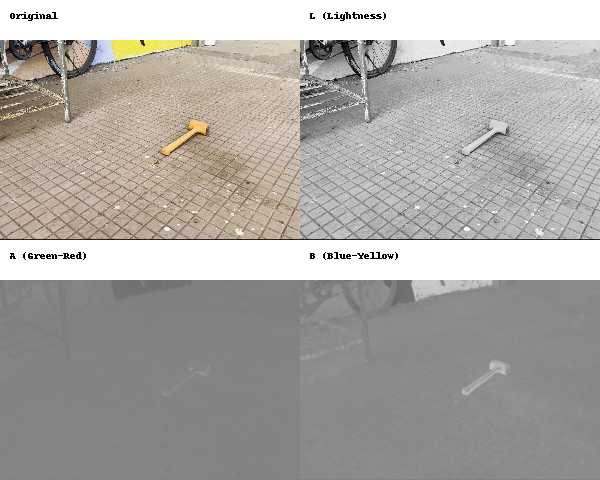

In [ ]:
if img is not None:
    # Convert to LAB
    lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    
    # Split channels
    L, A, B = cv2.split(lab_img)
    
    print("LAB Color Space:")
    print("  L (Lightness): 0 (black) to 255 (white)")
    print("  A: Green to Red axis")
    print("  B: Blue to Yellow axis")
    
    plot_images(frame_size=(300, 200), **{
        "Original": img,
        "L (Lightness)": cv2.cvtColor(L, cv2.COLOR_GRAY2BGR),
        "A (Green-Red)": cv2.cvtColor(A, cv2.COLOR_GRAY2BGR),
        "B (Blue-Yellow)": cv2.cvtColor(B, cv2.COLOR_GRAY2BGR)
    })

## 9. Image Filtering

### 9.1 Smoothing/Blurring
Blurring is used to reduce noise and detail.

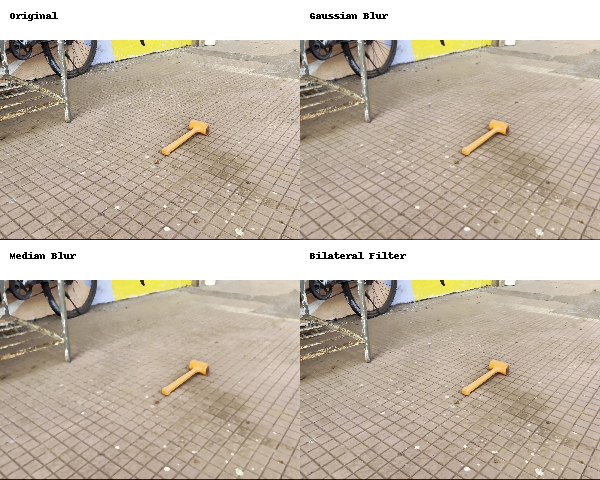

In [ ]:
def apply_gaussian_blur(img, ksize=5):
    """Apply Gaussian blur to reduce noise."""
    return cv2.GaussianBlur(img, (ksize, ksize), 0)

def apply_median_blur(img, ksize=5):
    """Apply median blur to remove salt-and-pepper noise."""
    return cv2.medianBlur(img, ksize)

def apply_bilateral_filter(img, d=9, sigma_color=75, sigma_space=75):
    """Apply bilateral filter to smooth while preserving edges."""
    return cv2.bilateralFilter(img, d, sigma_color, sigma_space)

if img is not None:
    gaussian = apply_gaussian_blur(img, ksize=11)
    median = apply_median_blur(img, ksize=11)
    bilateral = apply_bilateral_filter(img)
    
    plot_images(frame_size=(300, 200), **{
        "Original": img,
        "Gaussian Blur": gaussian,
        "Median Blur": median,
        "Bilateral Filter": bilateral
    })

### 9.2 Sharpening

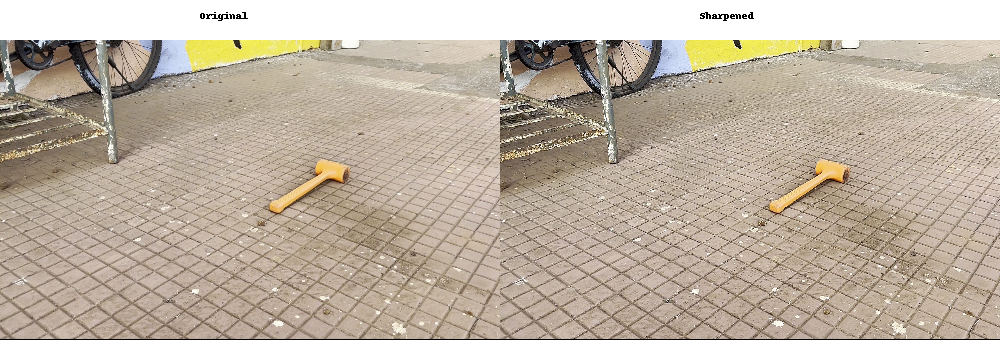

In [ ]:
def sharpen_image(img, amount=1.5):
    """Sharpen image using unsharp masking."""
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    sharpened = cv2.addWeighted(img, 1 + amount, blurred, -amount, 0)
    return sharpened

if img is not None:
    sharpened = sharpen_image(img, amount=2.0)
    
    display_images(img, sharpened, "Original", "Sharpened")

## 10. Edge Detection

Edge detection identifies boundaries in images.

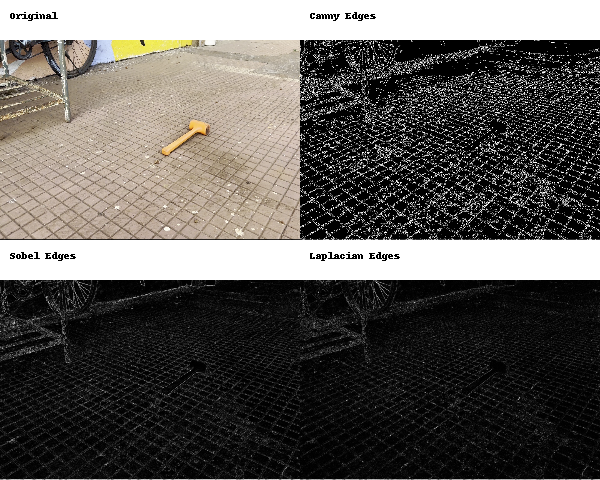

In [ ]:
def detect_edges_canny(img, low_thresh=50, high_thresh=150):
    """Detect edges using Canny edge detector."""
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img
    return cv2.Canny(gray, low_thresh, high_thresh)

def detect_edges_sobel(img):
    """Detect edges using Sobel operator."""
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img
    
    # Compute gradients
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    
    # Compute magnitude
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = np.uint8(255 * magnitude / np.max(magnitude))
    
    return magnitude

def detect_edges_laplacian(img):
    """Detect edges using Laplacian."""
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img
    
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    return cv2.convertScaleAbs(laplacian)

if img is not None:
    edges_canny = detect_edges_canny(img)
    edges_sobel = detect_edges_sobel(img)
    edges_laplacian = detect_edges_laplacian(img)
    
    plot_images(frame_size=(300, 200), **{
        "Original": img,
        "Canny Edges": cv2.cvtColor(edges_canny, cv2.COLOR_GRAY2BGR),
        "Sobel Edges": cv2.cvtColor(edges_sobel, cv2.COLOR_GRAY2BGR),
        "Laplacian Edges": cv2.cvtColor(edges_laplacian, cv2.COLOR_GRAY2BGR)
    })

## 11. Contrast Enhancement

### 11.1 Histogram Equalization

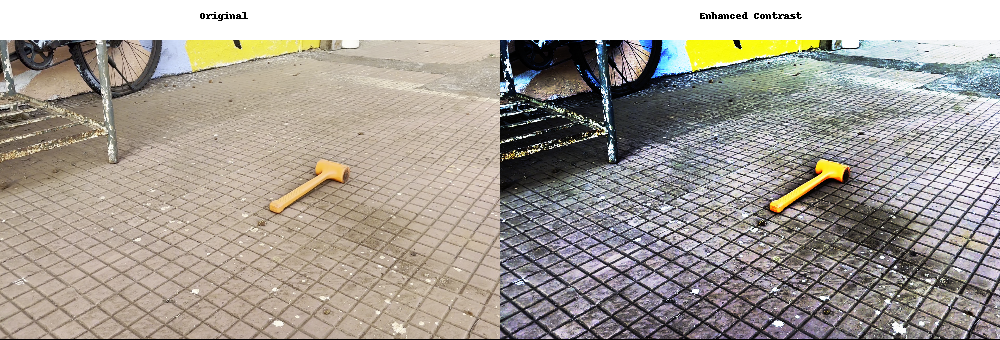

TypeError: order must be str, not numpy.ndarray

In [ ]:
def enhance_contrast(img):
    """Enhance contrast using histogram equalization."""
    if len(img.shape) == 3:
        # For color images, equalize each channel
        r, g, b = cv2.split(img)
        r_eq = cv2.equalizeHist(r)
        g_eq = cv2.equalizeHist(g)
        b_eq = cv2.equalizeHist(b)
        return cv2.merge((r_eq, g_eq, b_eq))
    else:
        return cv2.equalizeHist(img)

if img is not None:
    enhanced = enhance_contrast(img)
    
    display_images(img, enhanced, "Original", "Enhanced Contrast")
    img.copy(enhanced)

### 11.2 CLAHE (Contrast Limited Adaptive Histogram Equalization)

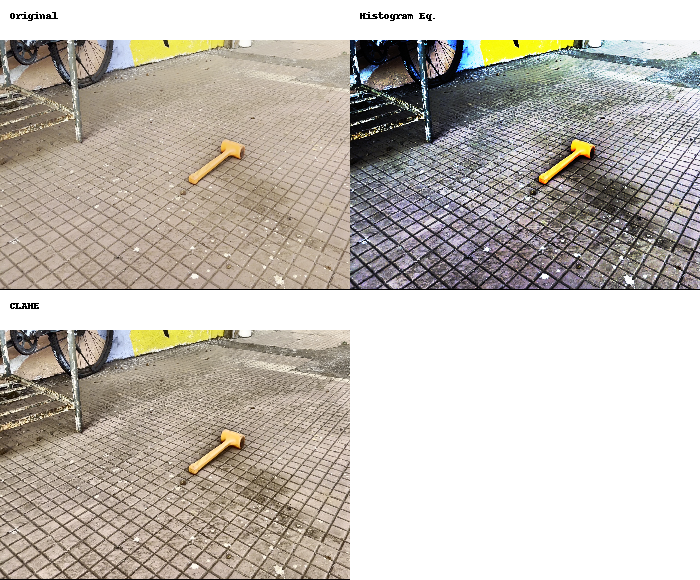

In [ ]:
def apply_clahe(img, clip_limit=2.0, tile_size=(8, 8)):
    """Apply CLAHE for adaptive contrast enhancement."""
    # Convert to LAB color space
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    
    # Apply CLAHE to L channel
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_size)
    l_enhanced = clahe.apply(l)
    
    # Merge back
    lab_enhanced = cv2.merge((l_enhanced, a, b))
    return cv2.cvtColor(lab_enhanced, cv2.COLOR_LAB2BGR)

if img is not None:
    clahe_result = apply_clahe(img)
    
    plot_images(frame_size=(350, 250), **{
        "Original": img,
        "Histogram Eq.": enhance_contrast(img),
        "CLAHE": clahe_result
    })

## 12. Thresholding

Thresholding converts grayscale images to binary (black and white).

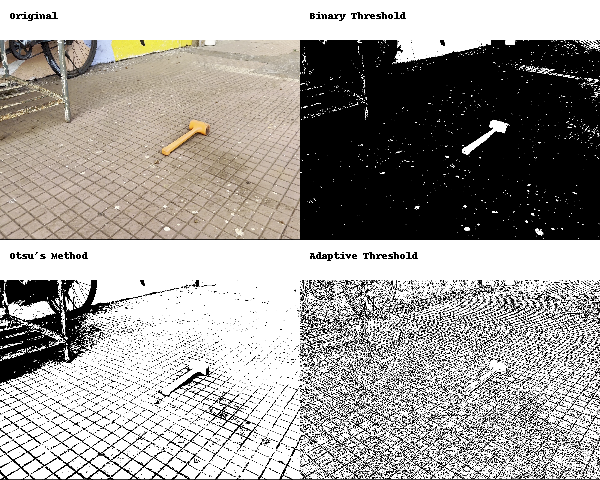

In [ ]:
if img is not None:
    # Convert to grayscale first
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:, :, 2]
    
    # Simple threshold
    _, binary = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY)
    
    # Otsu's thresholding (automatic threshold selection)
    _, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Adaptive thresholding
    adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY, 11, 2)
    
    plot_images(frame_size=(300, 200), **{
        "Original": img,
        "Binary Threshold": cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR),
        "Otsu's Method": cv2.cvtColor(otsu, cv2.COLOR_GRAY2BGR),
        "Adaptive Threshold": cv2.cvtColor(adaptive, cv2.COLOR_GRAY2BGR)
    })

## 13. Morphological Operations

Morphological operations work on binary images to clean up noise and fill gaps.

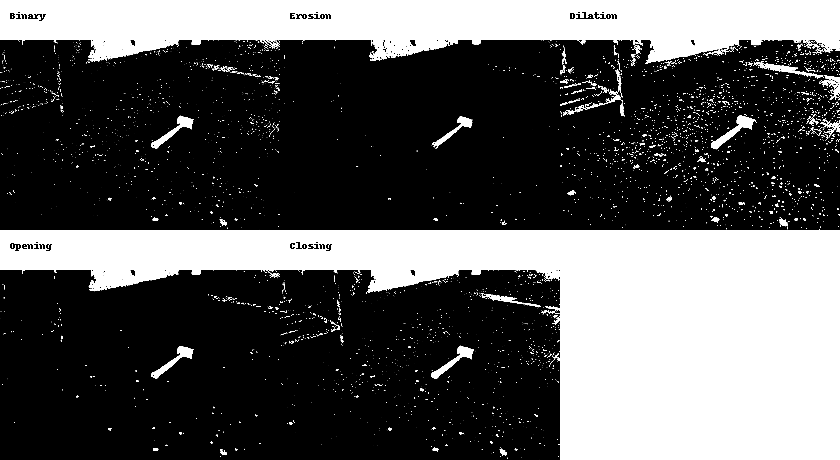

In [ ]:
if img is not None:
    # Get binary image first
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:, :, 2]
    _, binary = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY)
    
    # Define kernel
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    
    # Erosion - removes small white regions
    eroded = cv2.erode(binary, kernel, iterations=1)
    
    # Dilation - expands white regions
    dilated = cv2.dilate(binary, kernel, iterations=1)
    
    # Opening - erosion followed by dilation (removes noise)
    opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
    
    # Closing - dilation followed by erosion (fills small holes)
    closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    
    plot_images(frame_size=(280, 190), columns=3, **{
        "Binary": cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR),
        "Erosion": cv2.cvtColor(eroded, cv2.COLOR_GRAY2BGR),
        "Dilation": cv2.cvtColor(dilated, cv2.COLOR_GRAY2BGR),
        "Opening": cv2.cvtColor(opened, cv2.COLOR_GRAY2BGR),
        "Closing": cv2.cvtColor(closed, cv2.COLOR_GRAY2BGR)
    })
    img=np.copy(eroded)

## 14. Complete Processing Pipeline Example

Let's combine multiple techniques in a typical CV pipeline.

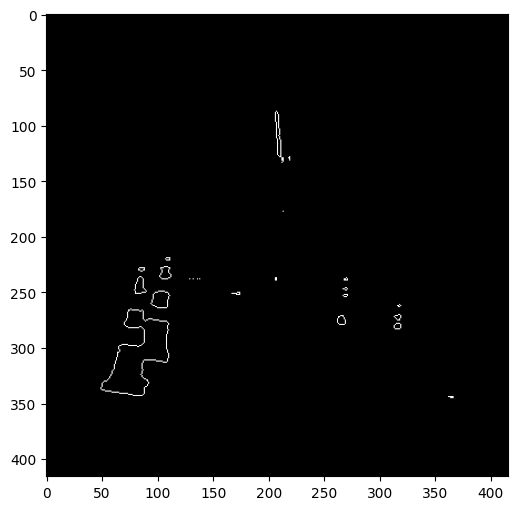

interactive(children=(IntSlider(value=633, description='idx', max=1267), Output()), _dom_classes=('widget-inte…

NameError: name 'img' is not defined

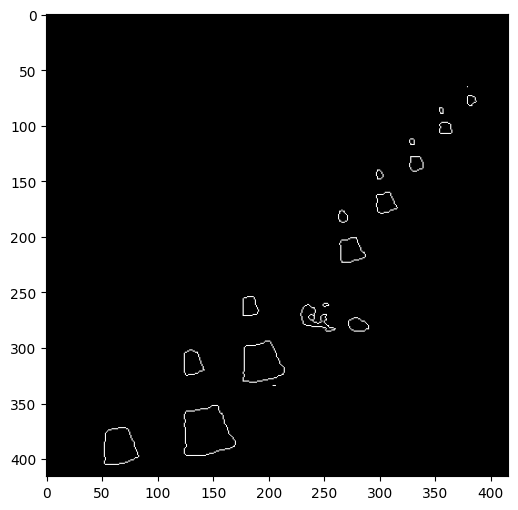

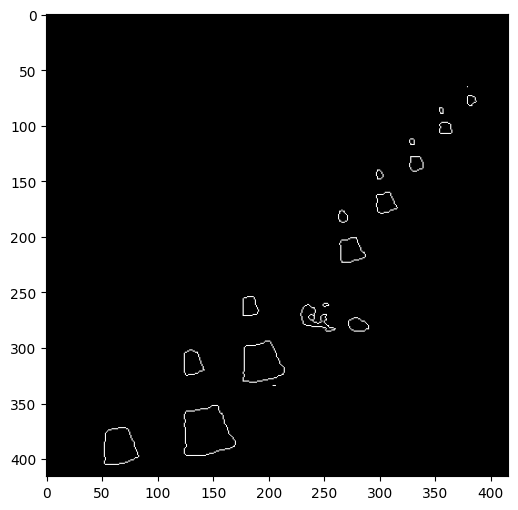

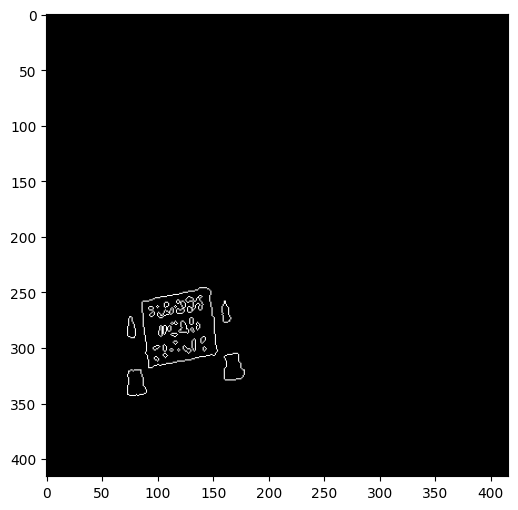

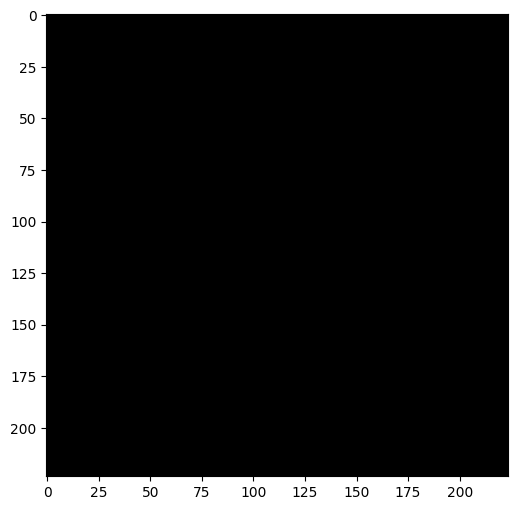

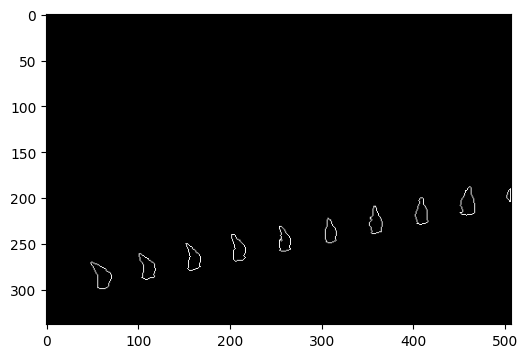

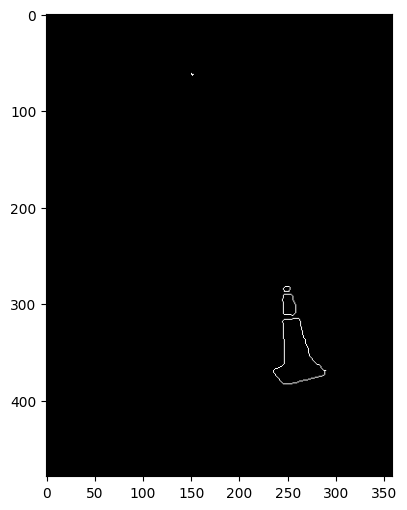

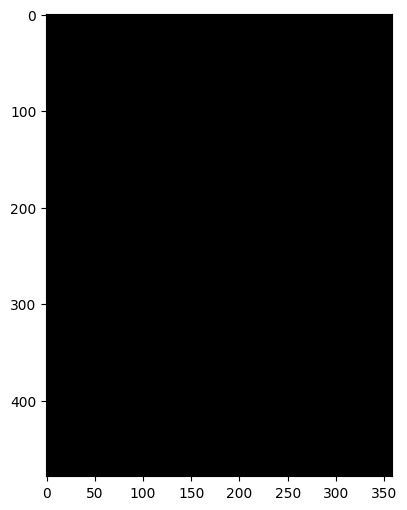

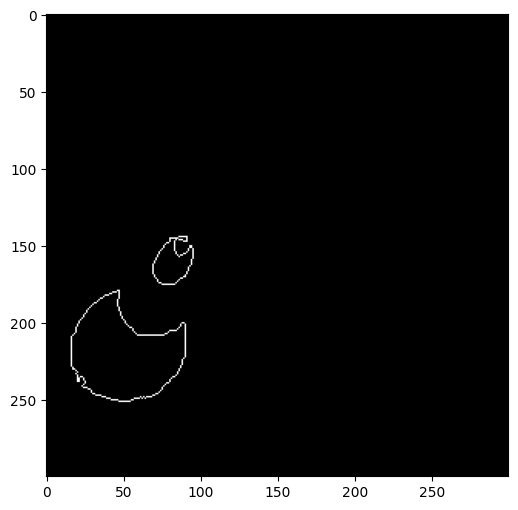

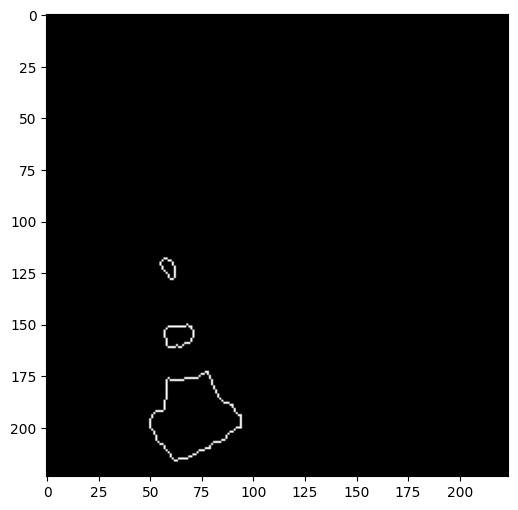

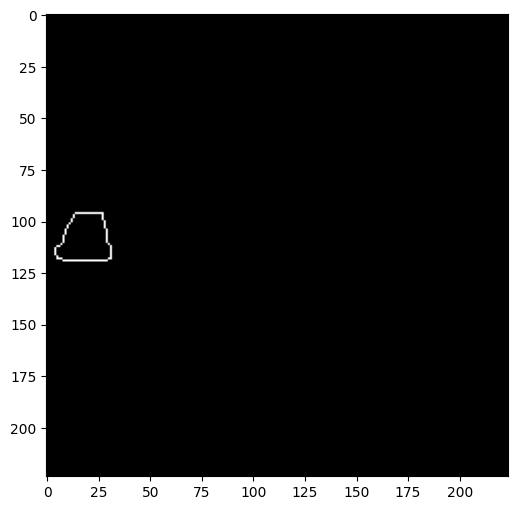

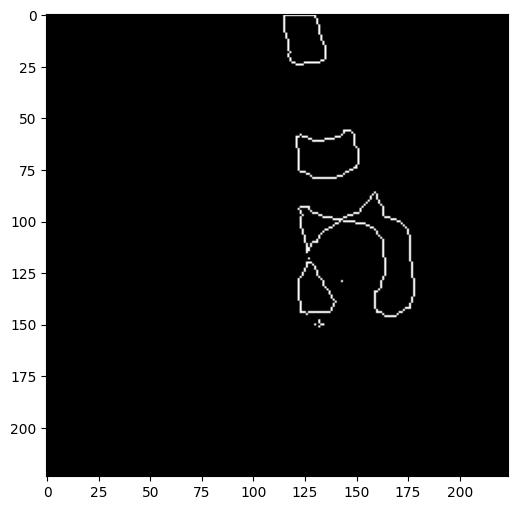

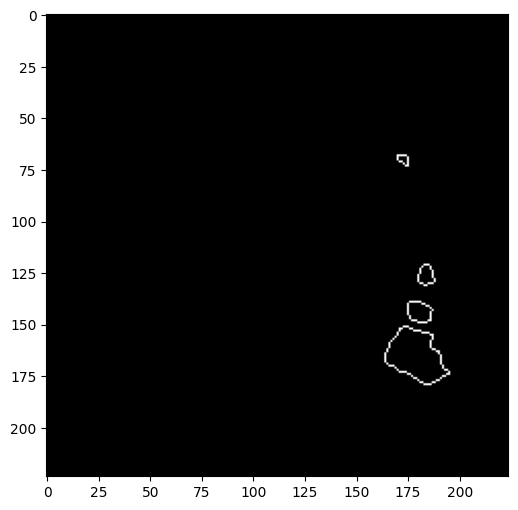

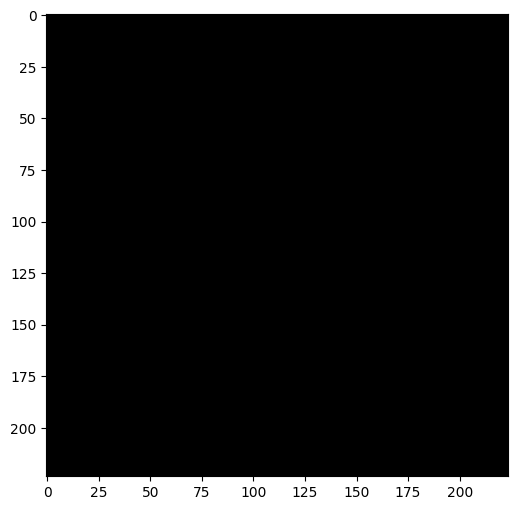

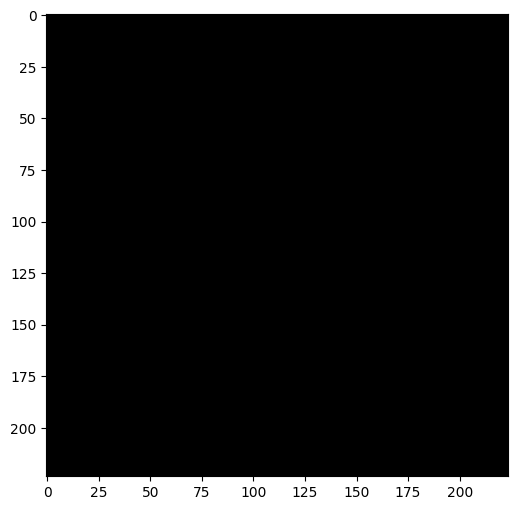

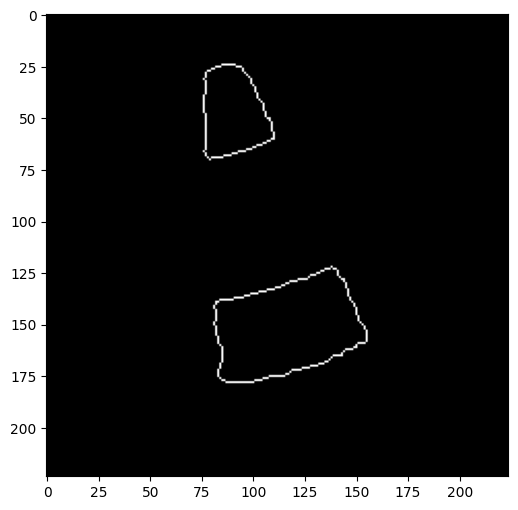

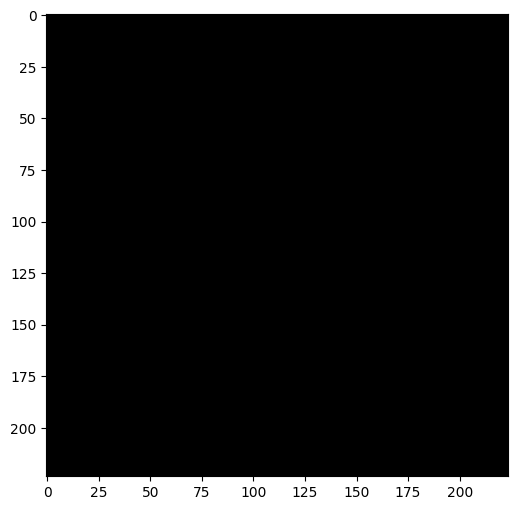

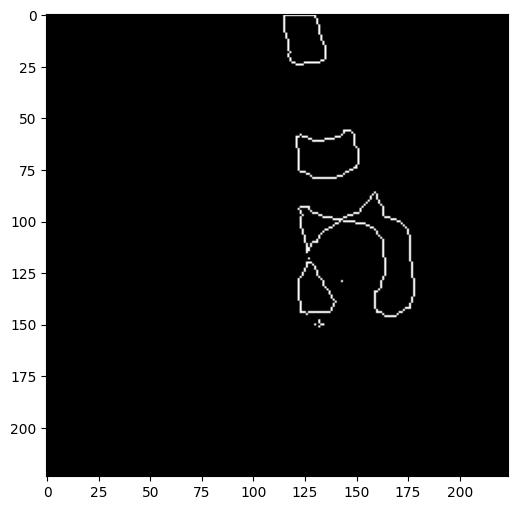

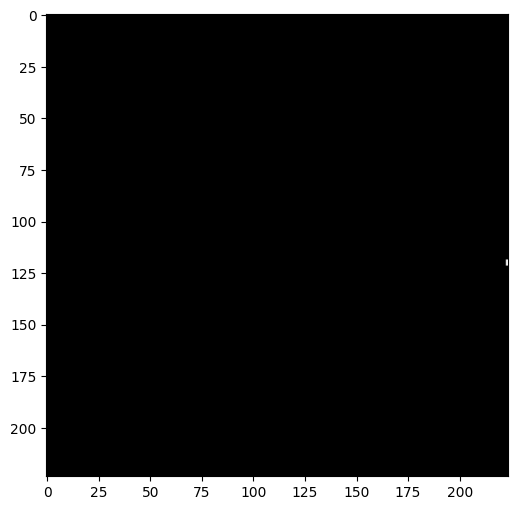

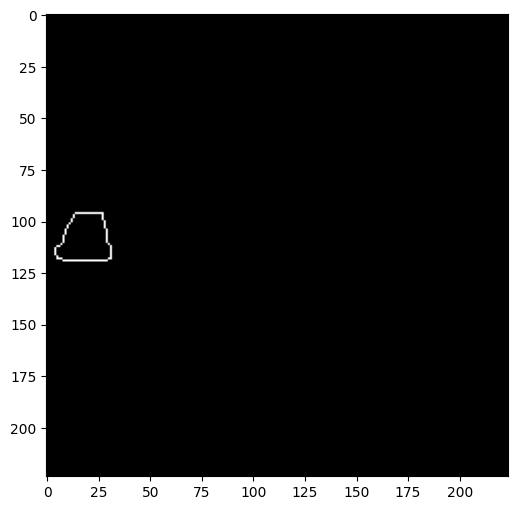

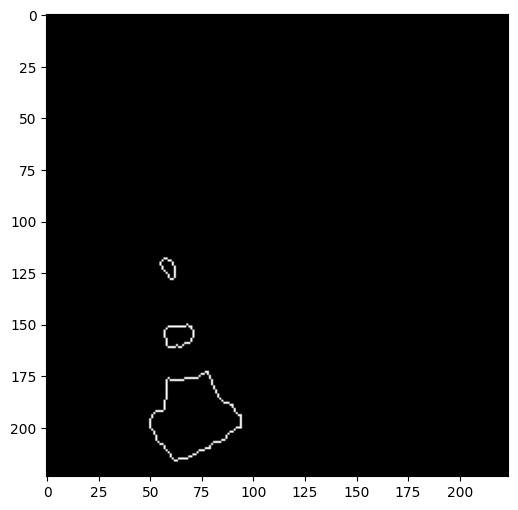

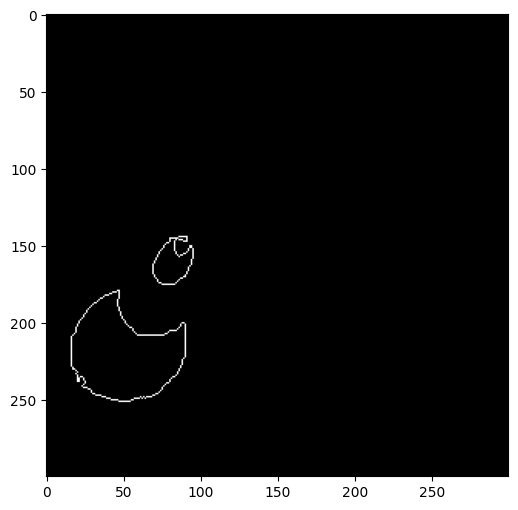

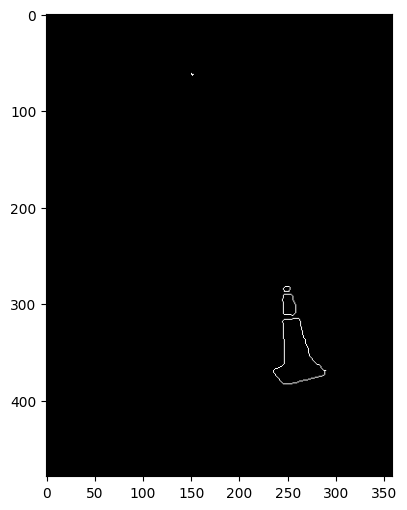

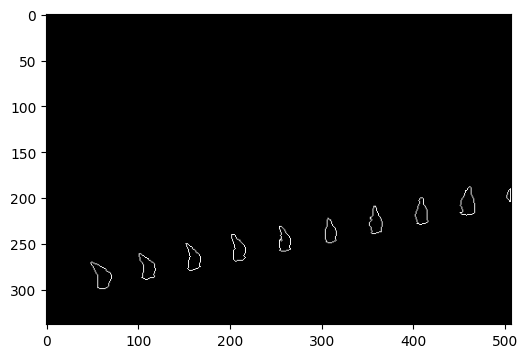

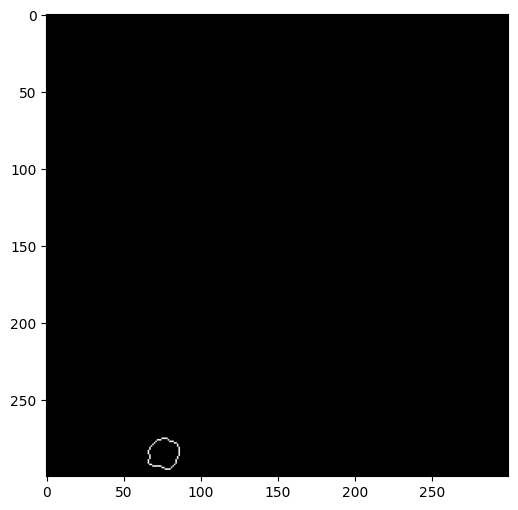

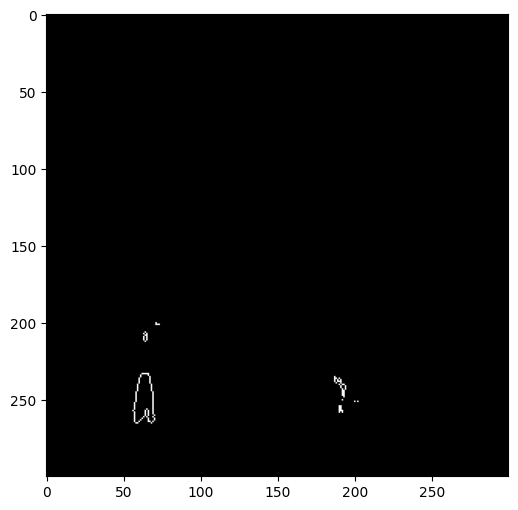

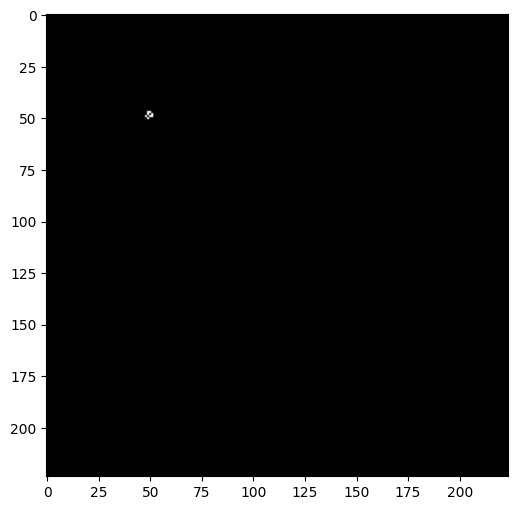

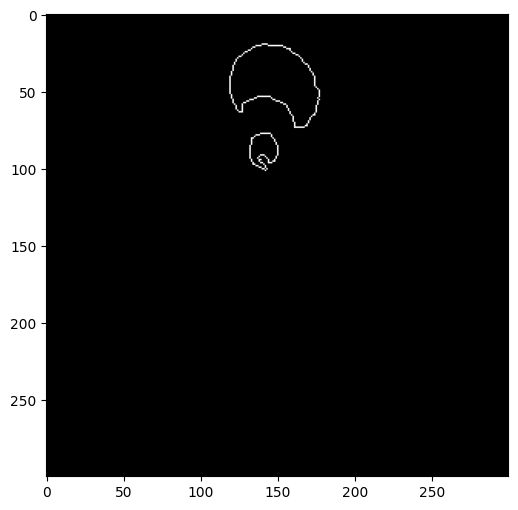

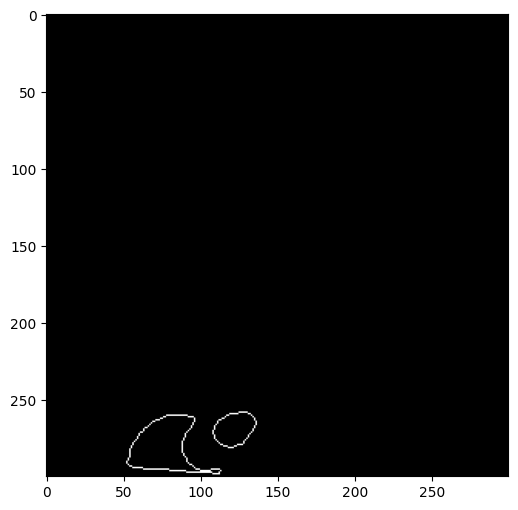

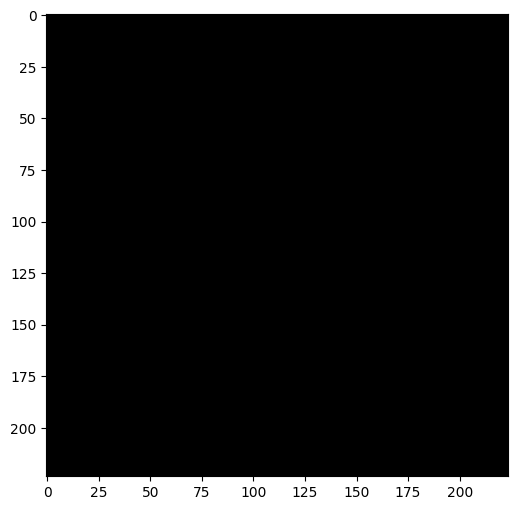

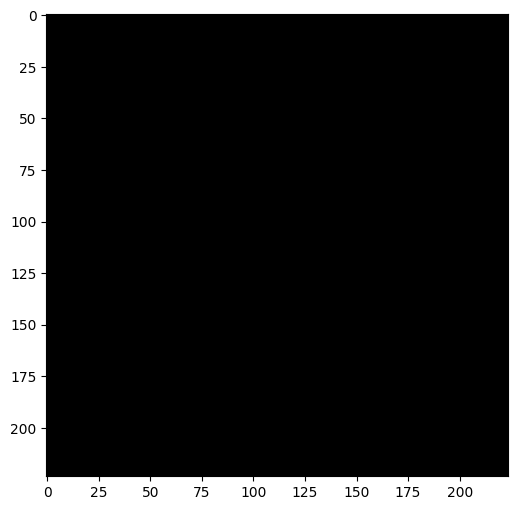

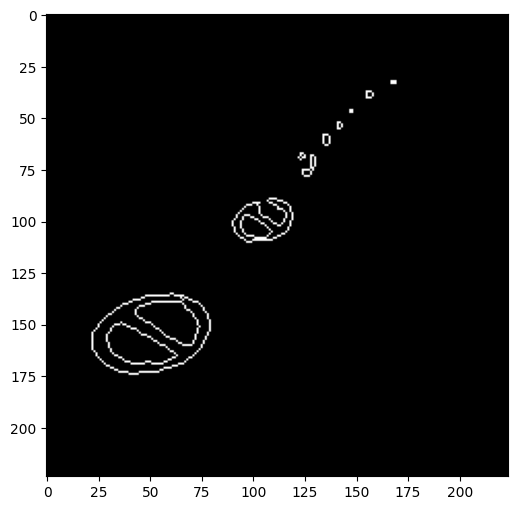

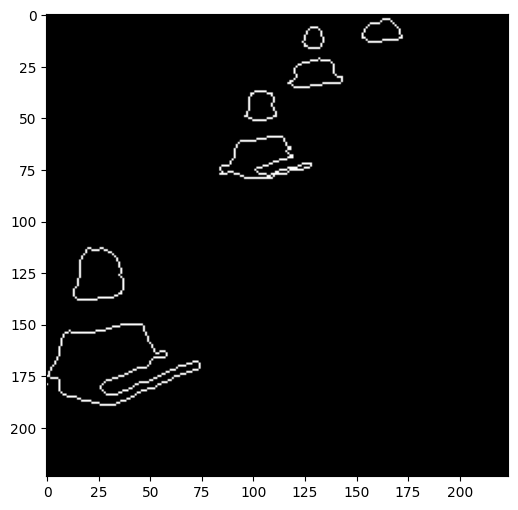

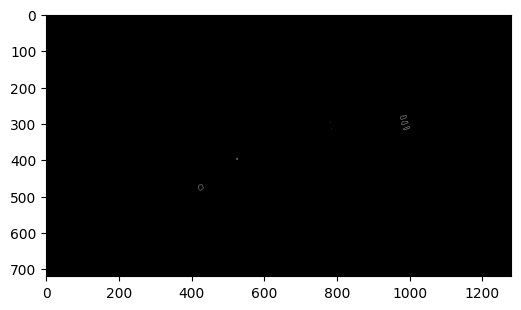

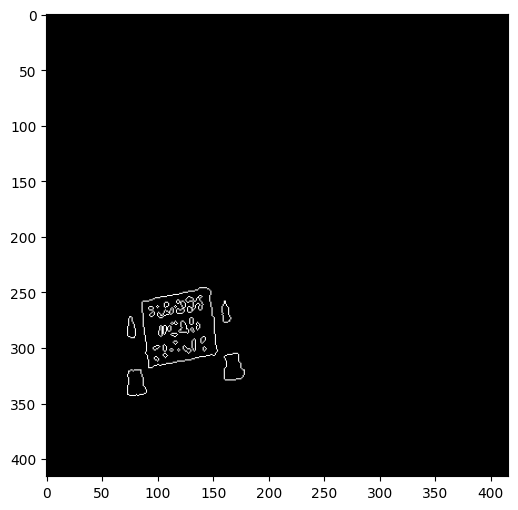

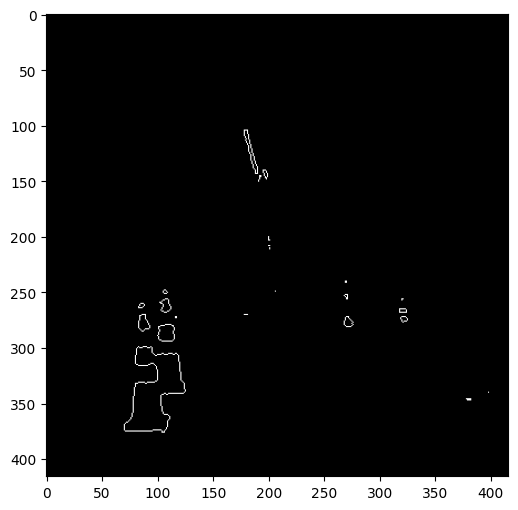

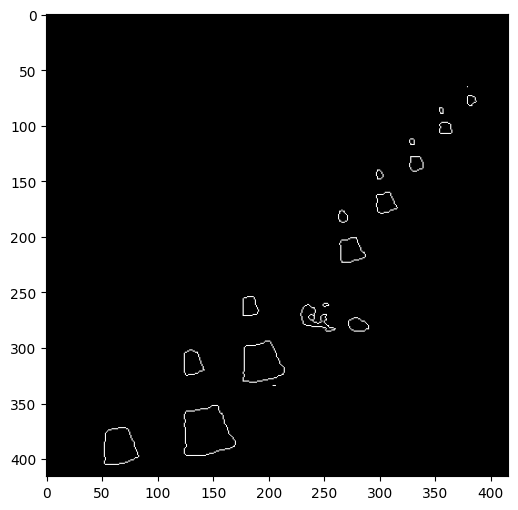

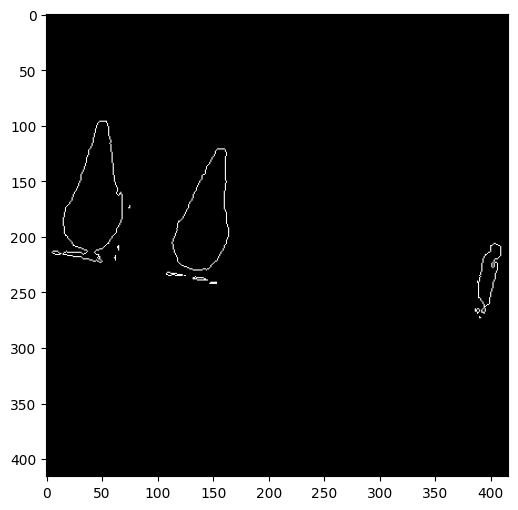

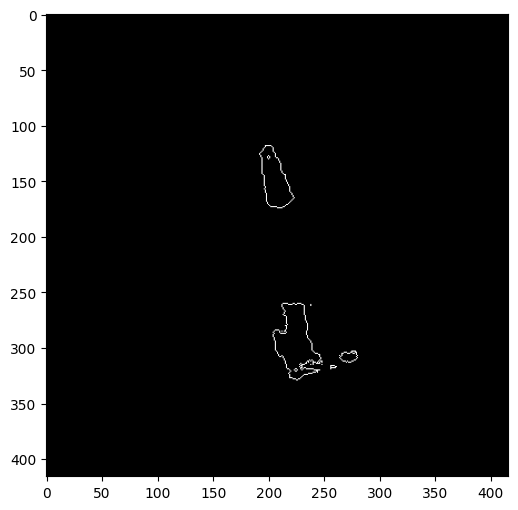

In [6]:
import os
import cv2
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np

# Folder containing images
img_dir = "Assignment-4/Cone_images"   # change if needed

# Collect all image paths from folder
image_paths = sorted([
    os.path.join(img_dir, f)
    for f in os.listdir(img_dir)
    if f.lower().endswith(('.jpg', '.png', '.jpeg'))
])

# Function called when slider moves
def scroll_images(idx):
    img = cv2.imread(image_paths[idx])              # read image
    orange2 = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)[:,:,1]
    orange2 = cv2.threshold(orange2, 150, 255, cv2.THRESH_BINARY)[1]
    counters, hierarchy = cv2.findContours(orange2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    contour_img = np.zeros_like(orange2)
    cv2.drawContours(contour_img, counters, -1,  255, 1)
    plt.figure(figsize=(6,6))
    plt.imshow(contour_img, cmap='gray')
    line_img= np.zeros_like(contour_img)
    lines = cv2.HoughLines(contour_img, 1, np.pi/180, threshold=50)
    for line in lines:
        (rho,theta) = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
 
        cv2.line(orange2,(x1,y1),(x2,y2),(0,0,255),2)
    c , heigh = cv2.findContours(orange2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in c :
        ret_val, triangle = cv2.minEnclosingTriangle(cnt)
        if not ret_val:
            continue
        area = cv2.contourArea(cnt)
        triangle_area = cv2.contourArea(np.int32(triangle))
        if area/triangle_area > 0.8 :
            x,y,w,h = cv2.boundingRect(cnt)
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)      # BGR -> RGB
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.title(f"Image {idx+1} / {len(image_paths)}")
    plt.axis('off')

# Slider to scroll through images
widgets.interact(
    scroll_images,
    idx=(0, len(image_paths)-1, 1)
)

def process_image_pipeline(img):
    """
    Complete image processing pipeline.
    """
    # Step 1: Denoise with bilateral filter
    denoised = cv2.bilateralFilter(img, 9, 75, 75)
    
    # Step 2: Enhance contrast with CLAHE
    lab = cv2.cvtColor(denoised, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l = clahe.apply(l)
    enhanced = cv2.merge((l, a, b))
    enhanced = cv2.cvtColor(enhanced, cv2.COLOR_LAB2BGR)
    
    # Step 3: Convert to grayscale
    gray = cv2.cvtColor(enhanced, cv2.COLOR_BGR2GRAY)
    frame = cv2.cvtColor(enhanced, cv2.COLOR_BGR2HSV)[:,:,2]
    # Step 4: Detect edges
    edges = cv2.Canny(frame, 50, 150)
    
    # Step 5: Clean up edges with morphology
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    edges_clean = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
    
    return {
        "original": img,
        "denoised": denoised,
        "enhanced": enhanced,
        "gray": cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR),
        "edges": cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR),
        "edges_clean": cv2.cvtColor(edges_clean, cv2.COLOR_GRAY2BGR)
    }

if img is not None:
    results = process_image_pipeline(img)
    
    plot_images(frame_size=(320, 220), columns=3, **{
        "1. Original": results["original"],
        "2. Denoised": results["denoised"],
        "3. Enhanced": results["enhanced"],
        "4. Grayscale": results["gray"],
        "5. Edges": results["edges"],
        "6. Cleaned Edges": results["edges_clean"]
    })

In [4]:
import matplotlib
print(matplotlib.__version__)
print(matplotlib.__file__)


3.5.1
/usr/lib/python3/dist-packages/matplotlib/__init__.py


## 15. Summary

### What You've Learned:
✅ Reading and displaying images and videos  
✅ Basic transformations (resize, rotate, flip)  
✅ Working with color spaces (RGB, HSV, LAB, Grayscale)  
✅ Image filtering (blur, sharpen)  
✅ Edge detection (Canny, Sobel, Laplacian)  
✅ Contrast enhancement (Histogram Eq., CLAHE)  
✅ Thresholding techniques  
✅ Morphological operations  
✅ Building complete processing pipelines  


### Useful Resources:
- OpenCV Documentation: https://docs.opencv.org/
- OpenCV Tutorials: https://docs.opencv.org/master/d9/df8/tutorial_root.html
- Computer Vision Course: https://opencv.org/courses/

Happy coding!